In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import os
import requests
import copy


In [6]:
# team_id = 1
# crop_vars = (True,(181,62)) if team_id == 0 else (False,(370, 320),500)
# item = {"crop": lambda *x: (0,0,x[1][0],x[1][1]) if x[0] else (x[2]-x[1][0],0,x[2],x[1][1])}
# crop_bounds = item["crop"](*crop_vars)
# #crop_bounds


# test = lambda *x: (0, 0, x[1][0])


SyntaxError: can't use starred expression here (2593925602.py, line 9)

In [ ]:
# url={}
# data_type = 'agent'
# response = requests.get('https://valorant-api.com/v1/agents')
# for _ in response.json()['data']:
#     if _['role'] is None:
#         continue
#     url[_["displayName"].lower().replace('/', '')] = {
#         "full_image": _['fullPortrait'], 
#         "headshot":_['displayIcon'],
#         "role": _['role']["displayIcon"]
#     }


# path = f'..\\data\\{data_type}s'
# if data_type == 'agent':
#     path += '\\full_image'

# old = [_.replace('agent_', '').replace('map_', '').replace('.png', '') for _ in [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]]
# new = list(set(url.keys()) - set(old))
# path = f'..\\data\\{data_type}s'


# for i, _ in enumerate(new):
#     #progress(i, len(new), suffix=f' Downloading new {data_type} image: {_}')
#     if len(url[_]) == 3:
#         for name, item in url[_].items():
#             response = requests.get(item, timeout=30)
#             finalpath = f'{path}\\{name}\\{data_type}_{_}.png'
#             with open(finalpath, 'wb') as f:
#                 f.write(response.content)    
#     else:
#         response = requests.get(url[_], timeout=30)
#         finalpath = f'{path}\\{data_type}_{_}.png'
#         with open(finalpath, 'wb') as f:
#             f.write(response.content)



In [7]:
cur_path = os.path.abspath('')[:-4]
base_image = base_image = os.path.join(cur_path,"data\\ggsheetreal.png")

fonts = {
        "ddin": {
            "mvp_agent": ImageFont.truetype(os.path.join(cur_path,"data\\fonts\\DINNextLTPro-Medium.ttf"), 28),
            "player_agent": ImageFont.truetype(os.path.join(cur_path,"data/fonts/DINNextLTPro-Medium.ttf"), 14),
            "map_label": ImageFont.truetype(os.path.join(cur_path,"data/fonts/DINNextLTPro-Regular.ttf"), 40),
            "map_text": ImageFont.truetype(os.path.join(cur_path,"data/fonts/DINNextLTPro-Medium.ttf"), 45),
            "win_loss_label": ImageFont.truetype(os.path.join(cur_path,"data/fonts/DINNextLTPro-Medium.ttf"), 35),
            "player_stat_label": ImageFont.truetype(os.path.join(cur_path,"data/fonts/DINNextLTPro-Regular.ttf"), 12),
            "timestamp": ImageFont.truetype(os.path.join(cur_path,"data/fonts/DINNextLTPro-Regular.ttf"), 22),
        },
        "tungsten": {
            "mvp_player": ImageFont.truetype(os.path.join(cur_path,"data/fonts/Tungsten-Bold.ttf"), 70),
            "mvp_stats": ImageFont.truetype(os.path.join(cur_path,"data/fonts/Tungsten-Bold.ttf"), 65),
            "mvp_label": ImageFont.truetype(os.path.join(cur_path,"data/fonts/Tungsten-Bold.ttf"), 35),
            "header_scores": ImageFont.truetype(os.path.join(cur_path,"data/fonts/Tungsten-Bold.ttf"), 165),
            "header_team_name": ImageFont.truetype(os.path.join(cur_path,"data/fonts/Tungsten-Bold.ttf"), 100),
            "player_name": ImageFont.truetype(os.path.join(cur_path,"data/fonts/Tungsten-Bold.ttf"), 40),
            "player_stats": ImageFont.truetype(os.path.join(cur_path,"data/fonts/Tungsten-Bold.ttf"), 52),
        }
    }

other_side_offsets = {
        "mvps": {
            "text": 1116,
            "images": 0,
            "overrides": {
                "kd": 0,
                "kills": 0,
                "combat_score": 0,
                "mvp_gradient": 0,
                "mvp_label": 0,
            }
        },
        "players": {
            "text": 124,
            "images": 124,
            "team": 739,
        },
    }

In [3]:
game_data = {
'match_id': 'dc67e9f9-38af-4dac-acc6-155812202d55', 
 'match_map': '/Game/Maps/Juliett/Juliett', 
 'match_mode': 'competitive', 
 'timestamp': '10/26/2023 23:03:17', 
 'match_mode_display_name': 'Competitive', 
 'match_map_display_name': 'Pearl', 
 'teams': [
     {'team_name': 'Red', 
     'team_alias': 'ATK', 
     'won_bool': True, 
     'won': 'WIN', 
     'rounds_won': 13}, 
     
     {'team_name': 'Blue', 
     'team_alias': 'DEF', 
     'won_bool': False, 
     'won': 'LOSS', 'rounds_won': 9}
    ], 
'players': [
    [
        {'puuid': 'dc20858b-5167-5616-b7cd-31fe9f7f0e47', 
         'display_name': 'Rigby', 
         'team_id': 'Red', 
         'agent_id': 'add6443a-41bd-e414-f6ad-e58d267f4e95', 
         'agent_display_name': 'Jett', 
         'kd': '1.6', 
         'kills': 23,
         'deaths': 14,
         'first_kills': 7, 
         'combat_score': 297
         }, 
        {'puuid': 'cc8e6cd2-2b4d-5bb4-b688-5acf365bd001', 
         'display_name': 'kal', 
         'team_id': 'Red', 
         'agent_id': '1e58de9c-4950-5125-93e9-a0aee9f98746', 
         'agent_display_name': 'Killjoy', 
         'kd': '1.5', 
         'kills': 19,
         'deaths': 13, 
         'combat_score': 261
         }, 
         {'puuid': '67756afb-a43a-5090-a6e2-fa4b495e968e', 'display_name': 'megamini', 'team_id': 'Red', 'agent_id': '9f0d8ba9-4140-b941-57d3-a7ad57c6b417', 'agent_display_name': 'Brimstone', 'kd': '1.1', 'kills': 18, 'deaths': 16, 'combat_score': 226}, 
         {'puuid': 'bd65a639-631b-5b48-a124-0099614c100a', 'display_name': 'Gabexz15', 'team_id': 'Red', 'agent_id': '569fdd95-4d10-43ab-ca70-79becc718b46', 'agent_display_name': 'Sage', 'kd': '1.4', 'kills': 18, 'deaths': 13, 'combat_score': 215}, 
         {'puuid': '13979f14-8506-53e1-8031-8c36a60ffe78', 'display_name': 'Privateaqua', 'team_id': 'Red', 'agent_id': 'e370fa57-4757-3604-3648-499e1f642d3f', 'agent_display_name': 'Gekko', 'kd': '0.7', 'kills': 11, 'deaths': 15, 'combat_score': 125}
        ], 
         [{'puuid': '5745e9ef-a5cf-5158-9276-0f9e64ad2e87', 'display_name': 'TeeHaychZee', 'team_id': 'Blue', 'agent_id': '5f8d3a7f-467b-97f3-062c-13acf203c006', 'agent_display_name': 'Breach', 'kd': '1.2', 'kills': 21, 'deaths': 18, 'first_kills': 3, 'combat_score': 273}, 
          {'puuid': 'b7ea50d6-6ae1-51c0-b324-8b77f2980609', 'display_name': 'HughJascok', 'team_id': 'Blue', 'agent_id': 'add6443a-41bd-e414-f6ad-e58d267f4e95', 'agent_display_name': 'Jett', 'kd': '1.0', 'kills': 18, 'deaths': 18, 'combat_score': 244}, 
          {'puuid': 'a3d9015e-e19f-5777-9d10-b1cd7bd3a962', 'display_name': 'Revo', 'team_id': 'Blue', 'agent_id': 'cc8b64c8-4b25-4ff9-6e7f-37b4da43d235', 'agent_display_name': 'Deadlock', 'kd': '0.8', 'kills': 13, 'deaths': 17, 'combat_score': 196}, 
          {'puuid': '12e8bd9a-2bae-5d09-aa09-bb0123bd58d3', 'display_name': 'bummers', 'team_id': 'Blue', 'agent_id': 'f94c3b30-42be-e959-889c-5aa313dba261', 'agent_display_name': 'Raze', 'kd': '0.5', 'kills': 10, 'deaths': 19, 'combat_score': 144}, 
          {'puuid': '5842417d-9eb9-5a15-b520-c827adb1a384', 'display_name': 'TOFA', 'team_id': 'Blue', 'agent_id': '41fb69c1-4189-7b37-f117-bcaf1e96f1bf', 'agent_display_name': 'Astra', 'kd': '0.5', 'kills': 9, 'deaths': 17, 'combat_score': 130}
        ]
    ]
}

In [4]:
team_red_name = "LOUD" #defenders
team_blue_name = "EG" #attackers
primary_color = (182, 164, 109)
secondary_color = (0, 0, 0)
tertiary_color = (255, 255, 255)

image_ref_points = {
    "header_footer": {
        "text": {
            "map_name": {
                "anchor": (47,953),
                "dimensions": (298,56),
                #This can probably be changed to an accent color. For now we keep white 
                "color": (255,255,255),
                "font": fonts["ddin"]["map_text"],
                "var_name": lambda *x: game_data["match_map_display_name"],
                "justify": 'c',
                "upper": True,
            }
        },
        "images": {
            "map": {
                "anchor": (48, 543),
                "dimensions": (1280,720),
                "crop": lambda *x: (491, 115, 787, 601),
                "file_path": "data/maps/map_{map}.png", 
            }
        }
    },
    "team_details": {
        "text": {
            "team_red_banner": {
                "anchor": (47, 48),
                "dimensions": (796, 157),
                "primary_color": primary_color,
                "secondary_color": secondary_color,
                "tertiary_color": tertiary_color

            }, 
            "team_blue_banner": {
                "anchor": (1075, 47),
                "dimensions": (796, 157),
                "primary_color": primary_color,
                "secondary_color": secondary_color,
                "tertiary_color": tertiary_color
            },
            "team_red_score": {
                "anchor": (724,90),
                "dimensions": (81,106),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["tungsten"]["header_scores"],
                "var_name": lambda *x: game_data["teams"][x[0]]["rounds_won"],
                "justify": "r"
            },
            "team_blue_score": {
                "anchor": (1114,90),
                "dimensions": (81,106),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["tungsten"]["header_scores"],
                "var_name": lambda *x: game_data["teams"][x[0]]["rounds_won"],
                "justify": "l"
            },
            "team_red_name": {
                "anchor": (48, 86),
                "dimensions": (350,92),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["tungsten"]["header_team_name"],
                "var_name": lambda *x: team_red_name if team_red_name is not None else game_data["teams"][x[0]]["team_alias"],
                "upper": True,
                "justify": "r"
            },
            "team_blue_name": {
                "anchor": (1330,98),
                "dimensions": (350,92),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["tungsten"]["header_team_name"],
                "var_name": lambda *x: team_blue_name if team_blue_name is not None else game_data["teams"][x[0]]["team_alias"],
                "upper": True,
                "justify": "l"
            },
            "team_red_wl": {
                "anchor": (542,80),
                "dimensions": (80,20),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["ddin"]["win_loss_label"],
                "var_name": lambda *x: game_data["teams"][x[0]]["won"],
                "upper": True,
                "justify": "r"
            },
            "team_blue_wl": {
                "anchor": (1331,80),
                "dimensions": (80,20),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["ddin"]["win_loss_label"],
                "var_name": lambda *x: game_data["teams"][x[0]]["won"],
                "upper": True,
                "justify": "l"
            },
        },
        "images": {
            
        }
    },
    "mvps": {
        "text": {
            "agent_name": {
                "anchor": (250,398),
                "dimensions": (301, 33), 
                "color": (139,150,154),
                "font": fonts["ddin"]["mvp_agent"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["agent_display_name"],
                "upper": True,
                "justify": "c"
            },
            "player_name": {
                "anchor": (180,432),
                "dimensions": (443,63),
                "color": (255,255,255),
                "font": fonts["tungsten"]["mvp_player"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["display_name"],
                "upper": True,
                "justify": "c"
            },
            "kd":{
                "anchor": (149,565),
                "dimensions": (126,48),
                "color": (255,255,255),
                "font": fonts["tungsten"]["mvp_stats"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["kd"],
                "justify": "c"
            },
            "combat_score": {
                "anchor": (330,565),
                "dimensions": (126,48),
                "color": (255,255,255),
                "font": fonts["tungsten"]["mvp_stats"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["combat_score"],
                "justify": "c"
            },
            "kills": {
                "anchor": (518,565),
                "dimensions": (126,48),
                "color": (255,255,255),
                "font": fonts["tungsten"]["mvp_stats"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["kills"],
                "justify": "c"
            },
            "mvp_label": {
                "anchor": (870,628),
                "dimensions": (72,41),
                "color": (255,255,255),
                "font": fonts["tungsten"]["mvp_label"],
                "text": "MVP",
                "justify": "c"
            }
        },
        "images": {
            "agent_silhouette": {
                "anchor": (610,360),
                "dimensions": (332,310), 
                "crop": lambda *x: (0,0,x[1][0]*(2/3),x[1][1]) if x[0] else (x[1][0]*(1/3),0,x[1][0],x[1][1]),
            },
            "agent": {
                "anchor": (610,360),
                "dimensions": (332,310), 
                "target_width": 400,
                "crop": lambda *x: (0,0,x[1][0],x[1][1]) if x[0] else (x[2]-x[1][0],0,x[2],x[1][1]),
                "file_path": "data/agents/full_image/agent_{agent}.png"
            },
            "mvp_gradient": {
                "anchor": (642,629),
                "dimensions": (300,41),
                "file_path": "data/misc_assets/mvp_gradient_{side}.png" 
            }
        }
    },
    "players": {
        "text": {
            "agent_name": {
                "anchor": (102,697),
                "dimensions": (204, 20), 
                "color": (139,150,154),
                "font": fonts["ddin"]["player_agent"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["agent_display_name"],
                "upper": True,
                "justify": "c"
            },
            "player_name": {
                "anchor": (102,706),
                "dimensions": (204, 50), 
                "color": (255,255,255),
                "font": fonts["tungsten"]["player_name"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["display_name"] if len(game_data["players"][int(x[0])][int(x[1])]["display_name"]) < 13 else game_data["players"][int(x[0])][int(x[1])]["display_name"][:11]+"...",
                "upper": True,
                "justify": "c"
            },
            "combatscore_label": {
                "anchor": (117,943),
                "dimensions": (174, 26), 
                "color": (138,148,156),
                "font": fonts["ddin"]["player_stat_label"],
                "text": "combat score",
                "upper": True,
                "justify": "l"
            },
            "kd_label": {
                "anchor": (117,943),
                "dimensions": (174, 26), 
                "color": (138,148,156),
                "font": fonts["ddin"]["player_stat_label"],
                "text": "KD",
                "upper": True,
                "justify": "r"
            },
            "combat_score": {
                "anchor": (117,895),
                "dimensions": (174, 60), 
                "color": (255,255,255),
                "font": fonts["tungsten"]["player_stats"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["combat_score"],
                "justify": "l"
            },
            "kd": {
                "anchor": (117,895),
                "dimensions": (174, 60), 
                "color": (255,255,255),
                "font": fonts["tungsten"]["player_stats"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["kd"],
                "justify": "r"
            },
        },
        "images": {
            "agent": {
                "anchor": (57,748),
                "dimensions": (294,230), 
                "slot_width": 204,
                "crop": lambda *x: (abs(57-(x[0]//2)),0,57+(x[1][0]-(x[0]//2)),x[1][1]),
                "file_path": "data/agents/headshot/agent_{agent}.png"
            },
            "player_gradient": {
                "anchor": (102,803),
                "dimensions": (204,175), 
                "crop": lambda *x: (0,0,x[0][0]+x[1][0],x[1][1]),
                "file_path": "data/misc_assets/player_gradient.png"
            },
            "role": {
                "anchor": (57,748),
                "dimensions": (294,230), 
                "slot_width": 204,
                "crop": lambda *x: (abs(57-(x[0]//2)),0,57+(x[1][0]-(x[0]//2)),x[1][1]),
                "file_path": "data/agents/role/agent_{agent}.png"
            }
        },
    }
}

In [5]:
def draw_team_details():
    refs = image_ref_points["team_details"]
    #for img_type, image in refs["images"].items():

    for team_id,team in enumerate(game_data["teams"]):
        team_name = team["team_name"].lower()

        # draw scores
        score_label = refs["text"][f"team_{team_name}_score"]
        __draw_text(score_label,int(team_id))

        team_name_label = refs["text"][f"team_{team_name}_name"]
        team_name_label["color"] = (139,140,137) if not team["won_bool"] else team_name_label["color"]
        __draw_text(team_name_label,int(team_id))

        team_wl_label = refs["text"][f"team_{team_name}_wl"]
        team_wl_label["color"] = team_wl_label["color"] if team["won_bool"] else team_wl_label["alt_color"]
        __draw_text(team_wl_label,int(team_id))


def __draw_image(img_data,new_img,size_axis="y",crop_vars=(),anchor_override=None,no_draw=False):
    #ADD JUSTIFY FOR IMAGE, BASICALLY IF L KEEP BUT IF R TAKE ANCHOR AND SUBTRACT DIMENSIONS
    width, height = new_img.size
    ratio = width/height if size_axis == "y" else height/width
    new_height = 0
    new_width = 0

    if img_data.get("target_width"):
        new_width = img_data["target_width"]
        new_height = int(ratio * new_width)
    else:
        if size_axis == "y":
            new_height = img_data["dimensions"][1]
            new_width = int(ratio * new_height)
        elif size_axis == "x":
            new_width = img_data["dimensions"][0]
            new_height = int(ratio * new_width)
    
    new_img = new_img.resize((new_width,new_height),Image.LANCZOS)

    crop_bounds = None
    if img_data.get("crop"):
        crop_bounds = img_data["crop"](*crop_vars)
        new_img = new_img.crop(crop_bounds)

    anchor = img_data["anchor"]
    if anchor_override is not None:
        anchor = anchor_override
    if img_data.get("justify"):
        if img_data['justify'] == 'r':
            anchor = (anchor[0] - img_data['dimensions'][0], anchor[1])
            #print("New justified anchor: ", anchor)
    if img_data.get("centered"):
        anchor = (anchor[0]-new_width//2,anchor[1]-new_height//2)
        anchor = ((img_data["dimensions"][0]//2)+anchor[0],(img_data["dimensions"][1]//2)+anchor[1])
          
    if not no_draw:
        img.paste(new_img, anchor, new_img)
    return new_img, anchor


def draw_header_footer():
    refs = image_ref_points["header_footer"]
    for img_type, image in refs["images"].items():
        new_img = Image.open(os.path.join(cur_path,*image["file_path"].format(map=game_data['match_map_display_name'].lower(),mode=game_data['match_mode'].lower()).split("/"))).convert("RGBA")
        __draw_image(image,new_img)


    for label_type,label in refs["text"].items():
        __draw_text(label)

def draw_players():
    player_refs = image_ref_points["players"]
    mvp_refs = image_ref_points["mvps"]
    for team_id,team in enumerate(game_data["players"]):
        # player panels
        if team_id != 0:
            # team offset (players)
            offset = other_side_offsets["players"]["team"]
            
            for ref,data in player_refs["text"].items():
                data["anchor"] = (data["anchor"][0]+offset,data["anchor"][1])
            for ref,data in player_refs["images"].items():
                data["anchor"] = (data["anchor"][0]+offset,data["anchor"][1])

            # team offset (mvps)
            text_offset = other_side_offsets["mvps"]["text"]
            image_offset = other_side_offsets["mvps"]["images"]
            for ref,data in mvp_refs["text"].items():
                if other_side_offsets["mvps"]["overrides"].get(ref):
                    data["anchor"] = (data["anchor"][0]+other_side_offsets["mvps"]["overrides"][ref],data["anchor"][1])
                else:
                    data["anchor"] = (data["anchor"][0]+text_offset,data["anchor"][1])
            for ref,data in mvp_refs["images"].items():
                if other_side_offsets["mvps"]["overrides"].get(ref):
                    data["anchor"] = (data["anchor"][0]+other_side_offsets["mvps"]["overrides"][ref],data["anchor"][1])
                else:
                    data["anchor"] = (data["anchor"][0]+image_offset,data["anchor"][1])


        for position,player in enumerate(team):

            if position == 0:
                # mvp player

                # load images
                for img_type,image in mvp_refs["images"].items():
                    new_img = None
                    if img_type == "agent": 
                        new_img = Image.open(os.path.join(cur_path,*image["file_path"].format(agent=player['agent_display_name']).split("/"))).convert("RGBA")
                        crop_v = (True,image["dimensions"]) if team_id == 0 else (False,image["dimensions"],image["target_width"])
                        agent_image, anchor = __draw_image(image,new_img,size_axis="x",crop_vars=crop_v,no_draw=True)
                    
                        # draw agent silhouette
                        agent_silhouette = mvp_refs["images"]["agent_silhouette"]
                        offset = 5
                        alpha = agent_image.getchannel('A')
                        silhouette = Image.new('RGBA', agent_image.size, color=(255,70,85,255) if team_id == 0 else (13,180,150,255))
                        silhouette.putalpha(alpha) 

                        s_crop_v = (True,image["dimensions"]) if team_id == 0 else (False,image["dimensions"])
                        anchor_o = (image["anchor"][0]-offset,image["anchor"][1]) if team_id == 0 else (int(image["anchor"][0]+(image["dimensions"][0]*(1/3)))+(offset+1),image["anchor"][1])
                        __draw_image(agent_silhouette,silhouette,size_axis="x",crop_vars=s_crop_v,anchor_override=anchor_o)

                        __draw_prepared_image(agent_image,anchor)


                    elif img_type == "mvp_gradient":
                        new_img = Image.open(os.path.join(cur_path,*image['file_path'].format(side=team_id).split("/"))).convert("RGBA")
                        __draw_image(image,new_img)
                        

                # load text
                for label_type,label in mvp_refs["text"].items():
                    __draw_text(label,int(team_id),int(position))

            else:
                # regular player 
                if position > 1:
                    # player offset
                    text_offset = other_side_offsets["players"]["text"]
                    image_offset = other_side_offsets["players"]["images"]
                    
                    for ref,data in player_refs["text"].items():
                        data["anchor"] = (data["anchor"][0],data["anchor"][1]+text_offset)
                    for ref,data in player_refs["images"].items():
                        data["anchor"] = (data["anchor"][0],data["anchor"][1]+image_offset)

                
                for img_type,image in player_refs["images"].items():
                    new_img = None
                    if img_type == "agent": 
                        new_img = Image.open(os.path.join(cur_path,*image["file_path"].format(agent=player['agent_display_name']).split("/"))).convert("RGBA")
                        __draw_image(image,new_img,size_axis="x",crop_vars=(image["slot_width"],image["dimensions"]),anchor_override=(image["anchor"][0]+45,image["anchor"][1]))
                    elif img_type == "player_gradient":
                        new_img = Image.open(os.path.join(cur_path,*image["file_path"].split("/"))).convert("RGBA")
                        __draw_image(image,new_img,crop_vars=(image["anchor"],image["dimensions"]))                   


                for label_type,label in player_refs["text"].items():
                    __draw_text(label,int(team_id),int(position))

def __draw_prepared_image(new_img,anchor):
    
    img.paste(new_img,anchor,new_img)

def __draw_text(label,*var):
    if label.get("justify"):
        justify = label["justify"]
    else:
        justify = "l"

    if label.get("var_name"):
        text = str(label["var_name"](*var))
    else:
        text = label["text"]
    text = text.upper() if label.get("upper") else text

    coords = label["anchor"]

    #w,h = label["font"].getsize(text)
    _, _, w, h = label["font"].getbbox(text)
    
    dimens = label["dimensions"]
    anchor = label["anchor"]

    if justify == "c":
        coords = (((dimens[0]-w)/2)+anchor[0],(((dimens[1]-h)/2)+anchor[1]))
    elif justify == "r":
        coords = ((dimens[0]-w)+anchor[0],(((dimens[1]-h)/2)+anchor[1]))
    elif justify == "l":
        coords = (anchor[0],(((dimens[1]-h)/2)+anchor[1]))

    draw.text(coords, text, label["color"], font=label["font"])

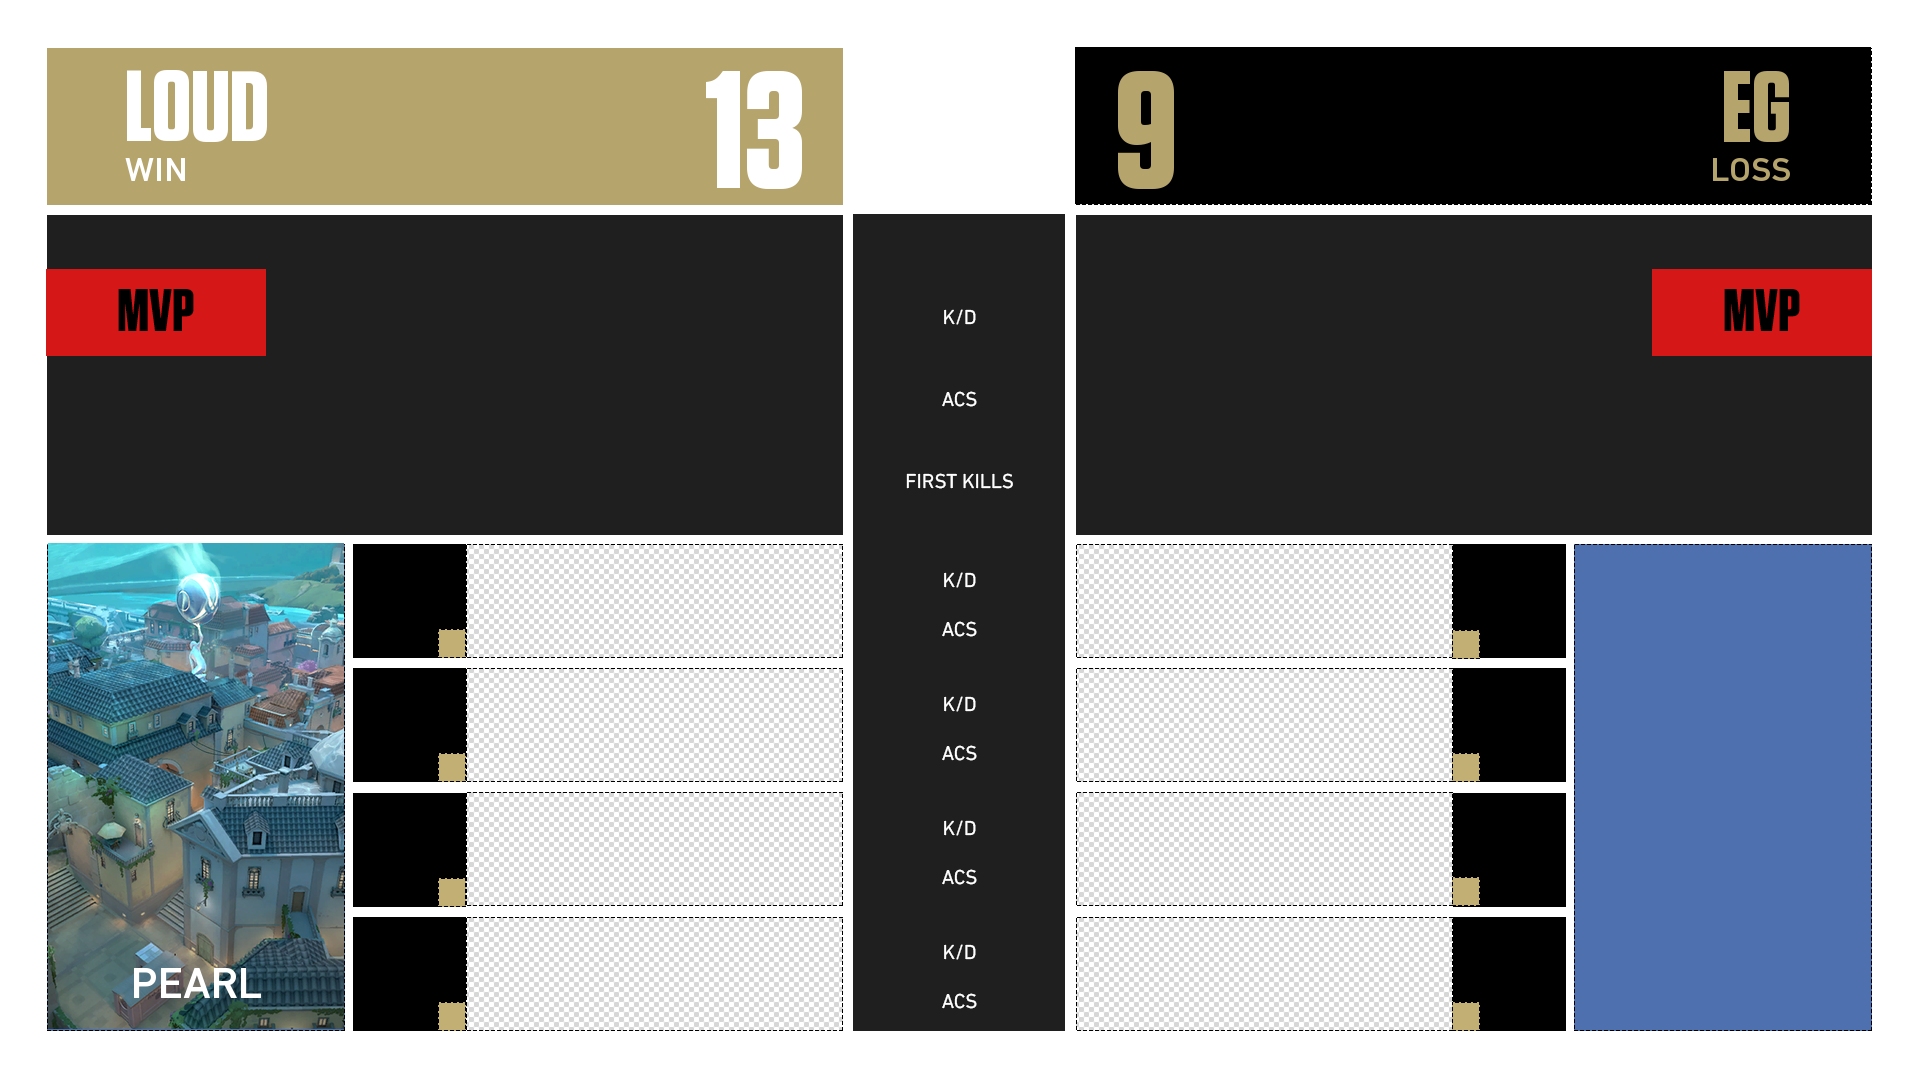

In [37]:
img = Image.open(base_image)
draw = ImageDraw.Draw(img)

#Map (and probably other image)
refs = image_ref_points["header_footer"]
for img_type, image in refs["images"].items():
    image = {
                "anchor": (48, 543),
                "dimensions": (1280,720),
                "crop": lambda *x: (491, 115, 787, 601),
                "file_path": "data/maps/map_{map}.png", 
            }
    #This gets the match type. Could maybe change to event type but for now let's comment this out
    new_img = Image.open(os.path.join(cur_path,*image["file_path"].format(map=game_data['match_map_display_name'].lower(),mode=game_data['match_mode'].lower()).split("/"))).convert("RGBA")
    __draw_image(image,new_img)

for label_type,label in refs["text"].items():
    if label_type == "map_name":
        label = {
            "anchor": (47,953),
            "dimensions": (298,56),
            #This can probably be changed to an accent color. For now we keep white 
            "color": (255,255,255),
            "font": fonts["ddin"]["map_text"],
            "var_name": lambda *x: game_data["match_map_display_name"],
            "justify": 'c',
            "upper": True,
                    }
        __draw_text(label)

#Header
refs = {
    "text": {
            "team_red_banner": {
                "anchor": (47, 48),
                "dimensions": (796, 157),
                "color": primary_color,
                "alt_color": secondary_color
            }, 
            "team_blue_banner": {
                "anchor": (1075, 47),
                "dimensions": (796, 157),
                "color": primary_color,
                "alt_color": secondary_color
            },
            "team_red_score": {
                "anchor": (724,70),
                "dimensions": (81,106),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["tungsten"]["header_scores"],
                "var_name": lambda *x: game_data["teams"][x[0]]["rounds_won"],
                "justify": "r"
            },
            "team_blue_score": {
                "anchor": (1114,70),
                "dimensions": (81,106),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["tungsten"]["header_scores"],
                "var_name": lambda *x: game_data["teams"][x[0]]["rounds_won"],
                "justify": "l"
            },
            "team_red_name": {
                "anchor": (125, 76),
                "dimensions": (225,52),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["tungsten"]["header_team_name"],
                "var_name": lambda *x: team_red_name if team_red_name is not None else game_data["teams"][x[0]]["team_alias"],
                "upper": True,
                "justify": "l"
            },
            "team_blue_name": {
                "anchor": (1791 - 225,76),
                "dimensions": (225,52),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["tungsten"]["header_team_name"],
                "var_name": lambda *x: team_blue_name if team_blue_name is not None else game_data["teams"][x[0]]["team_alias"],
                "upper": True,
                #this takes the X and adds the X of dimensions
                "justify": "r"
            },
            "team_red_wl": {
                "anchor": (125, 158),
                "dimensions": (80,20),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["ddin"]["win_loss_label"],
                "var_name": lambda *x: game_data["teams"][x[0]]["won"],
                "upper": True,
                "justify": "l"
            },
            "team_blue_wl": {
                "anchor": (1791 - 80 ,158),
                "dimensions": (80,20),
                "color": primary_color,
                "alt_color": tertiary_color,
                "font": fonts["ddin"]["win_loss_label"],
                "var_name": lambda *x: game_data["teams"][x[0]]["won"],
                "upper": True,
                "justify": "r"
            },
        }  
}
for team_id,team in enumerate(game_data["teams"]):
    team_name = team["team_name"].lower()

    #draw banner
    banner = refs["text"][f"team_{team_name}_banner"]
    banner["color"] = banner["alt_color"] if not team["won_bool"] else banner["color"]
    banner_img = Image.new("RGBA", banner["dimensions"], banner["color"])
    __draw_prepared_image(banner_img, banner["anchor"])


    #draw logo (maybe)

    # draw scores
    score_label = refs["text"][f"team_{team_name}_score"]
    score_label["color"] = score_label["color"] if not team["won_bool"] else score_label["alt_color"]
    __draw_text(score_label,int(team_id))

    team_name_label = refs["text"][f"team_{team_name}_name"]
    team_name_label["color"] = team_name_label["color"] if not team["won_bool"] else team_name_label["alt_color"]
    __draw_text(team_name_label,int(team_id))

    team_wl_label = refs["text"][f"team_{team_name}_wl"]
    team_wl_label["color"] = team_wl_label["color"] if not team["won_bool"] else team_wl_label["alt_color"]
    __draw_text(team_wl_label,int(team_id))

#MVP


img

(415, 543)
(415, 667)
(415, 667)
(415, 791)
(415, 791)
(415, 915)
(1392, 543)
(1392, 667)
(1392, 667)
(1392, 791)
(1392, 791)
(1392, 915)


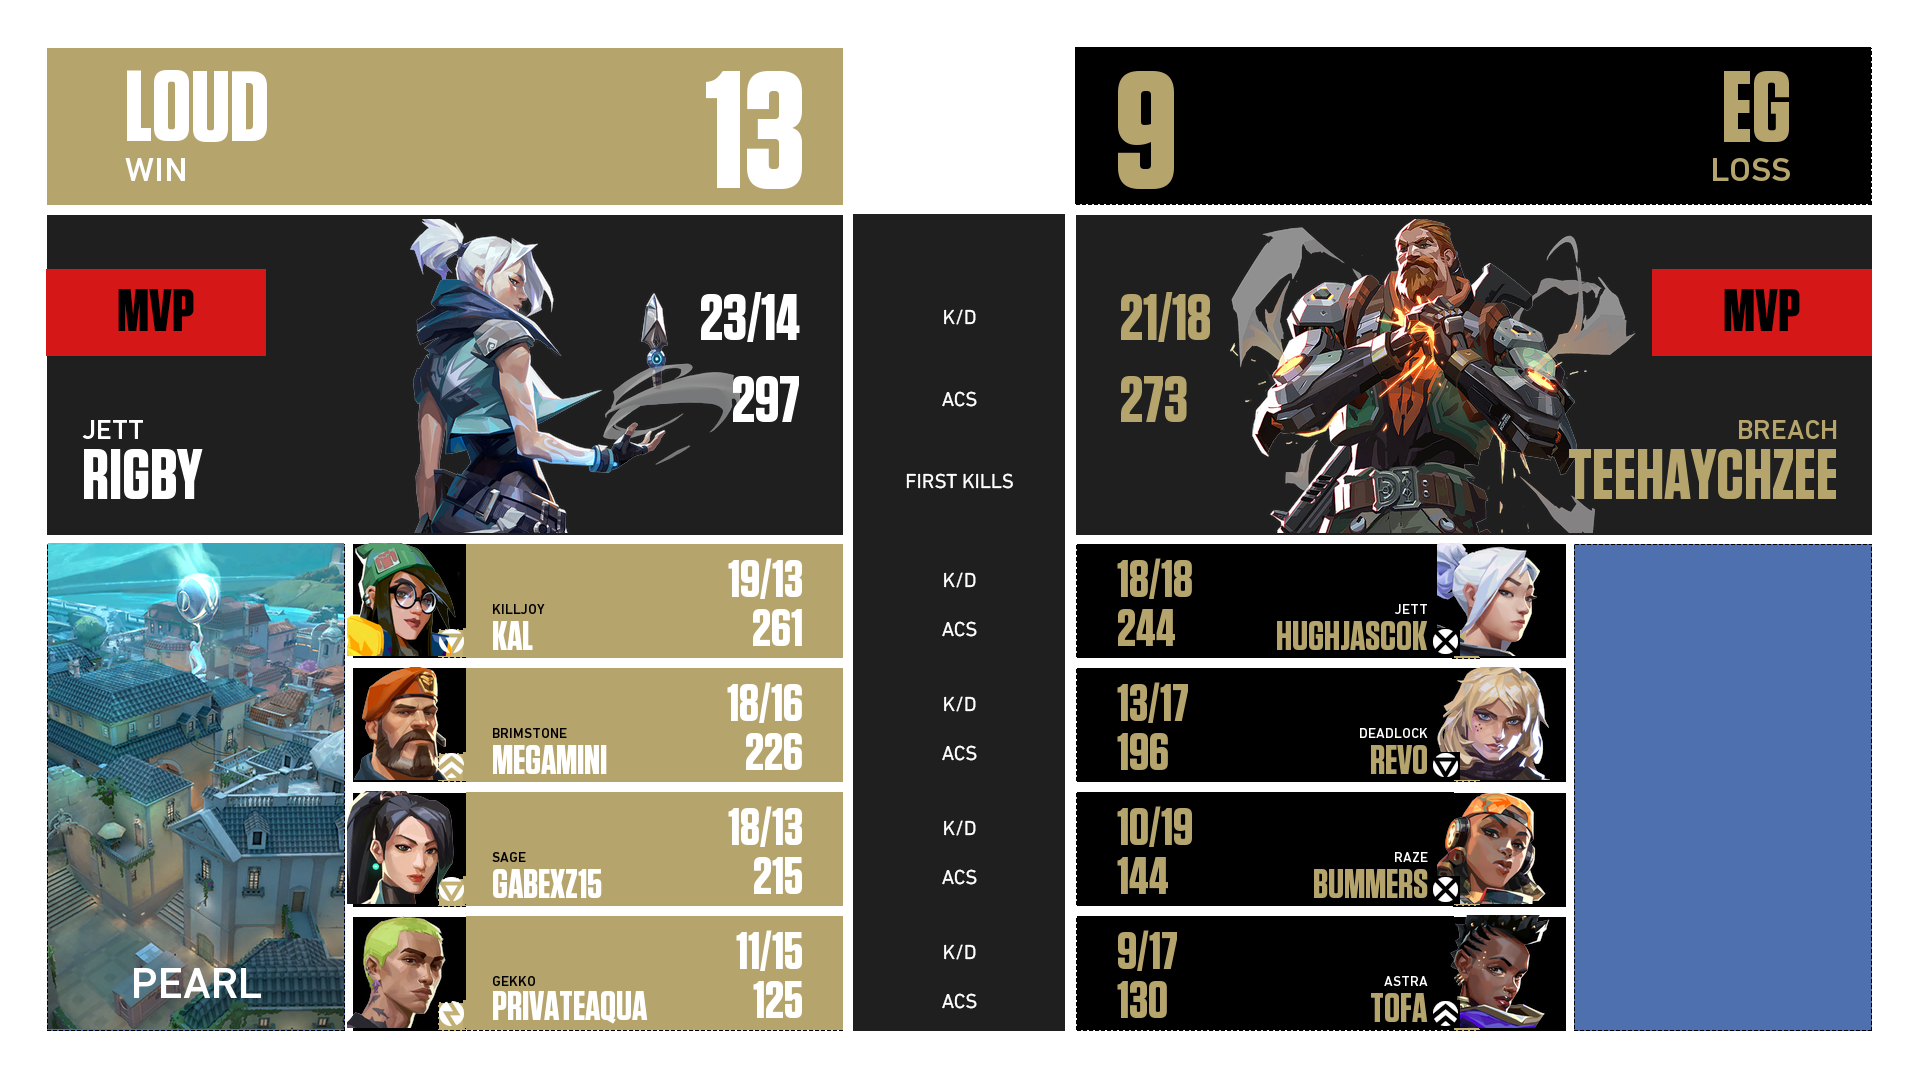

In [38]:

player_refs = {
        "text": {
            "agent_name": {
                "anchor": (492,600),
                "dimensions": (156, 17), 
                "color": secondary_color,
                "font": fonts["ddin"]["player_agent"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["agent_display_name"],
                "upper": True,
                "justify": "l"
            },
            "player_name": {
                "anchor": (492,626),
                "dimensions": (156, 17), 
                "color": tertiary_color,
                "font": fonts["tungsten"]["player_name"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["display_name"] if len(game_data["players"][int(x[0])][int(x[1])]["display_name"]) < 13 else game_data["players"][int(x[0])][int(x[1])]["display_name"][:11]+"...",
                "upper": True,
                "justify": "l"
            },

            "combat_score": {
                "anchor": (803 - 130, 605),
                "dimensions": (130, 40), 
                "color": tertiary_color,
                "font": fonts["tungsten"]["player_stats"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["combat_score"],
                "justify": "r"
            },
            "kd": {
                "anchor": (803-152, 547),
                "dimensions": (152, 60), 
                "color": tertiary_color,
                "font": fonts["tungsten"]["player_stats"],
                "var_name": lambda *x: f'{game_data["players"][int(x[0])][int(x[1])]["kills"]}/{game_data["players"][int(x[0])][int(x[1])]["deaths"]}',
                "justify": "r"
            },
        },
        "images": {
            "banner": {
                "anchor": (466, 544),
                "dimensions": (377, 114), 
                "color": primary_color,
                "justify": 'r',
            },
            "agent": {
                "anchor": (415,543),
                "dimensions": (113,114), 
                "slot_width": 114,
                "crop": lambda *x: (abs(57-(x[0]//2)),0,57+(x[1][0]-(x[0]//2)),x[1][1]),
                "file_path": "data/agents/headshot/agent_{agent}.png",
                "justify": 'r',
            },
            "role": {
                "anchor": (463, 628),
                "dimensions": (25, 25), 
                "slot_width": 114,
                "color": primary_color,
                "crop": lambda *x: (abs(57-(x[0]//2)),0,57+(x[1][0]-(x[0]//2)),x[1][1]),
                "file_path": "data/agents/role/agent_{agent}.png",
                "justify": 'r',
            }
        },
    }
mvp_refs = {
        "text": {
            "agent_name": {
                "anchor": (82,398),
                "dimensions": (181, 62), 
                "color": tertiary_color,
                "font": fonts["ddin"]["mvp_agent"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["agent_display_name"],
                "upper": True,
                "justify": "l"
            },
            "player_name": {
                "anchor": (82,452),
                "dimensions": (289,38),
                "color": (255,255,255),
                "font": fonts["tungsten"]["mvp_player"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["display_name"],
                "upper": True,
                "justify": "l"
            },
            "combat_score": {
                "anchor": (800 - 114,380),
                "dimensions": (114,33),
                "color": tertiary_color,
                "font": fonts["tungsten"]["mvp_stats"],
                "var_name": lambda *x: game_data["players"][int(x[0])][int(x[1])]["combat_score"],
                "justify": "r"
            },
            "kills": {
                "anchor": (800 - 165,294),
                "dimensions": (165,43),
                "color": tertiary_color,
                "font": fonts["tungsten"]["mvp_stats"],
                "var_name": lambda *x: f'{game_data["players"][int(x[0])][int(x[1])]["kills"]}/{game_data["players"][int(x[0])][int(x[1])]["deaths"]}',
                "justify": "r"
            }
            # "mvp_label": {
            #     "anchor": (870,628),
            #     "dimensions": (72,41),
            #     "color": (255,255,255),
            #     "font": fonts["tungsten"]["mvp_label"],
            #     "text": "MVP",
            #     "justify": "c"
            # }
        },
        "images": {
            "agent": {
                "anchor": (840, 219),
                "dimensions": (687,415), 
                "target_width": 887,
                #This is saying that the point I want is the right most point
                "justify": 'r',
                "crop": lambda *x: (100,101,x[1][0], x[1][1]) if x[0] else (x[2]-x[1][0],101,x[2] + x[2]-x[1][0] ,x[1][1]),
                "file_path": "data/agents/full_image/agent_{agent}.png"
            }
        }
    }

og_refs = copy.deepcopy(player_refs)
for team_id,team in enumerate(game_data["players"]):

    if team_id != 0:
        player_refs = og_refs
        for ref,data in player_refs["text"].items():
            data["anchor"] = (1920 - data["anchor"][0], data['anchor'][1])
            if data['justify'] == 'l':
                data['justify'] = 'r'
                data['anchor'] = (data["anchor"][0] - data['dimensions'][0], data['anchor'][1])
            elif data['justify'] == 'r':
                data['justify'] = 'l'
                data['anchor'] = (data["anchor"][0] - data['dimensions'][0], data['anchor'][1])
            else:
                data['justify'] = 'c'

            if data['color'] == primary_color:
                data['color'] = secondary_color
            elif data["color"] == secondary_color:
                data['color'] = tertiary_color
            else:
                data['color'] = primary_color

        for ref,data in player_refs["images"].items():
            data["anchor"] = (1920 - data["anchor"][0]- data['dimensions'][0], data['anchor'][1])
            if "color" in data:
                if data['color'] == primary_color:
                    data['color'] = secondary_color
                elif data["color"] == secondary_color:
                    data['color'] = tertiary_color
                else:
                    data['color'] = primary_color
        
            

        # team offset (mvps)
        for ref,data in mvp_refs["text"].items():
            data["anchor"] = (1920 - data["anchor"][0], data['anchor'][1])
            if data['justify'] == 'l':
                data['justify'] = 'r'
                data['anchor'] = (data["anchor"][0] - data['dimensions'][0], data['anchor'][1])
            elif data['justify'] == 'r':
                data['justify'] = 'l'
                data['anchor'] = (data["anchor"][0] - data['dimensions'][0], data['anchor'][1])
            else:
                data['justify'] = 'c'

            if data['color'] == primary_color:
                data['color'] = secondary_color
            elif data["color"] == secondary_color:
                data['color'] = tertiary_color
            else:
                data['color'] = primary_color

            
        for ref,data in mvp_refs["images"].items():
            data["anchor"] = (1920 - data["anchor"][0], data['anchor'][1])
            if "color" in data:
                if data['color'] == primary_color:
                    data['color'] = secondary_color
                elif data["color"] == secondary_color:
                    data['color'] = tertiary_color
                else:
                    data['color'] = primary_color
        
    
    for position,player in enumerate(team):

        if position == 0:

                
                
            # mvp player

            # load images
            for img_type,image in mvp_refs["images"].items():
                new_img = None
                if img_type == "agent": 

                    new_img = Image.open(os.path.join(cur_path,*image["file_path"].format(agent=player['agent_display_name']).split("/"))).convert("RGBA")
                    #crop_v = (True,image["dimensions"]) if team_id == 0 else (False,image["dimensions"],image["target_width"])
                    crop_v = (True,image["dimensions"])

                    if team_id == 1:
                        image['justify'] = 'l'
                    agent_image, anchor = __draw_image(image,new_img,size_axis="x",crop_vars=crop_v,no_draw=True)
                    #agent_image = ImageOps.expand(agent_image, border=1, fill='indianred')
                    __draw_prepared_image(agent_image,anchor)




            # load text
            for label_type,label in mvp_refs["text"].items():
                __draw_text(label,int(team_id),int(position))
        else:
            # regular player
            #if team_id != 0:

                #player_refs["text"] = og_position["text"]
                #player_refs["images"] = og_position["images"]
            if position > 1:
                # player offset
                text_offset = other_side_offsets["players"]["text"]
                image_offset = other_side_offsets["players"]["images"]

                
                for ref,data in player_refs["text"].items():
                    #print(f"{team_id}, {player['display_name']}, {position}, {ref}, {data['anchor']}")
                    data["anchor"] = (data["anchor"][0],data["anchor"][1]+text_offset)
                for ref,data in player_refs["images"].items():
                    #print(f"{team_id}, {player['display_name']}, {position}, {ref}, {data['anchor']}")
                    if ref == 'agent':
                        print(data['anchor'])
                    data["anchor"] = (data["anchor"][0], data["anchor"][1]+image_offset)
                    if ref == 'agent':
                        print(data['anchor'])

            
            for img_type,image in player_refs["images"].items():
                new_img = None
                if team_id == 1:
                    image["justify"] = 'l'
                
                if img_type == "agent": 
                    new_img = Image.open(os.path.join(cur_path,*image["file_path"].format(agent=player['agent_display_name']).split("/"))).convert("RGBA")
                    __draw_image(image,new_img,size_axis="x",crop_vars=(image["slot_width"],image["dimensions"]),anchor_override=(image["anchor"][0]+45,image["anchor"][1]))

                elif img_type =="role":
                    role_square = Image.new("RGBA", (image["dimensions"][0] + 3, image["dimensions"][1] + 3), image["color"])
                    __draw_prepared_image(role_square, image["anchor"])
                    new_img = Image.open(os.path.join(cur_path,*image["file_path"].format(agent=player['agent_display_name']).split("/"))).convert("RGBA")
                    __draw_image(image,new_img,size_axis="x",crop_vars=(image["slot_width"],image["dimensions"]),anchor_override=(image["anchor"][0] + 1,image["anchor"][1] + 1))

                elif img_type =="banner":
                    label_banner = Image.new("RGBA", image["dimensions"], image["color"])
                    newanchor = image['anchor']
                    if image['justify'] == 'l':
                        newanchor = (image['anchor'][0], image['anchor'][1])
                    __draw_prepared_image(label_banner, newanchor)

            for label_type,label in player_refs["text"].items():
                __draw_text(label,int(team_id),int(position))
    

img

KeyError: 'file_path'

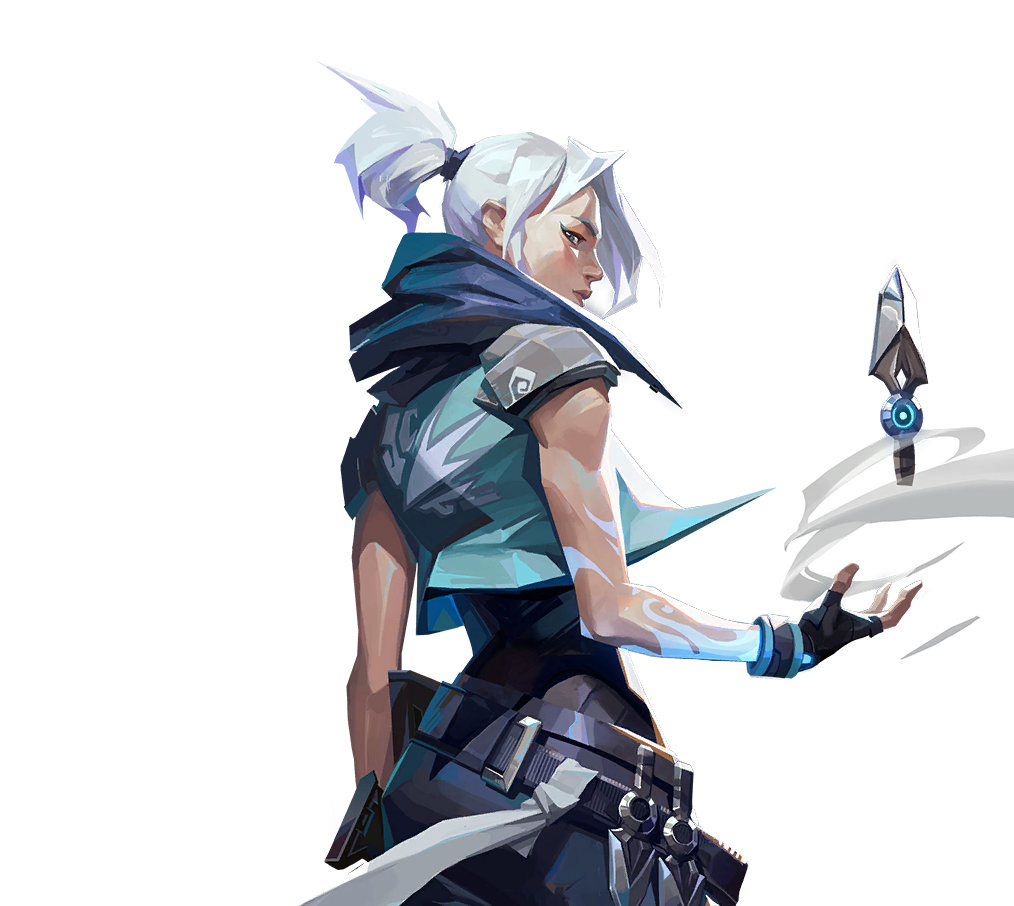

In [15]:


new_img = Image.open("C:\\Users\\ranam\\Desktop\\CS Stuff\\Prod Tools\\valpostmatch\\data\\agents\\full_image\\agent_jett.png")
new_img.crop((491, 141, 1505, 1047))